<h1>Image Processing using Python</h1>

author: indranil

There are faster implementaions of the codes, use those if necessary. The notebook is an attempt to understand how the individual functions work. If you are benefitted by this notebook, make sure to pay the author for a cup of coffee.

Image is 991 pixels by 1600 pixels


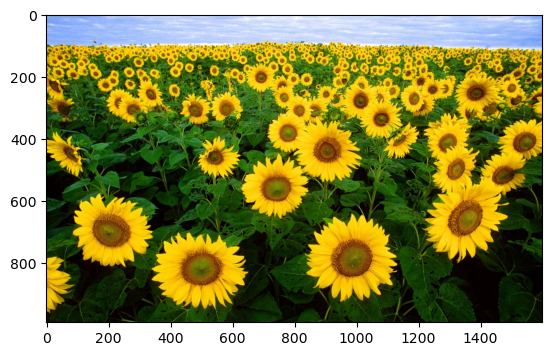

In [2]:
from matplotlib import image as img
from matplotlib import pyplot as plt

import numpy as np

path = "/Users/indranil/Documents/Python/Sept_24/11th_Sept/"

image_arr = img.imread(path + "Sunflower-field-Fargo-North-Dakota.jpg")

v_pxl_cts, h_pxl_cts, _ = np.shape(image_arr)

print(f"Image is {v_pxl_cts} pixels by {h_pxl_cts} pixels")

plt.imshow(image_arr)

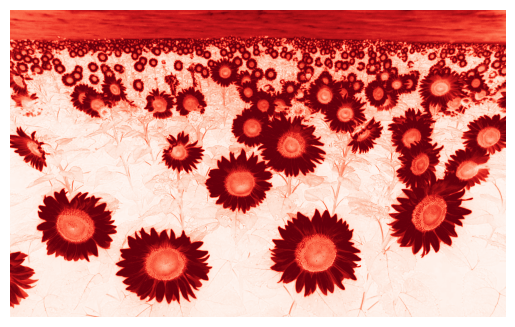

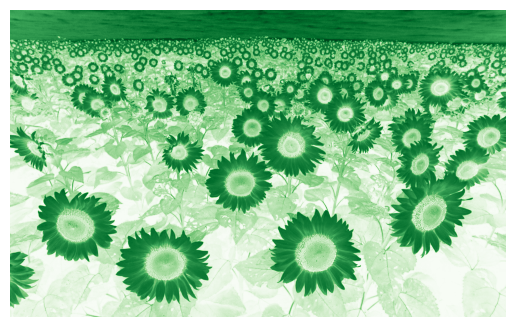

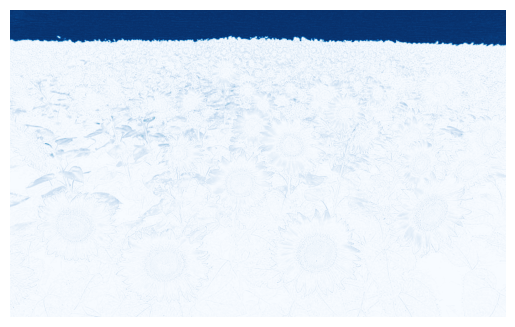

In [3]:
r_image = image_arr[:, :, 0]
g_image = image_arr[:, :, 1]
b_image = image_arr[:, :, 2]

plt.figure()
plt.imshow(r_image, cmap="Reds")
# plt.colorbar()
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(g_image, cmap="Greens")
# plt.colorbar()
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(b_image, cmap="Blues")
# plt.colorbar()
plt.axis("off")
plt.show()

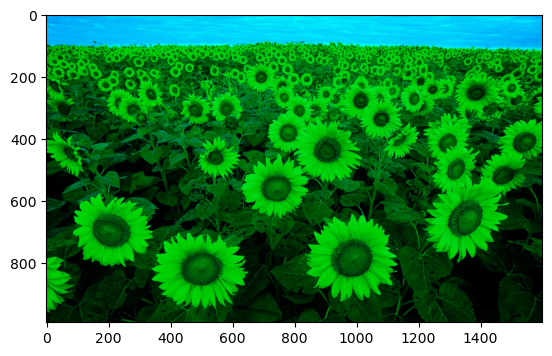

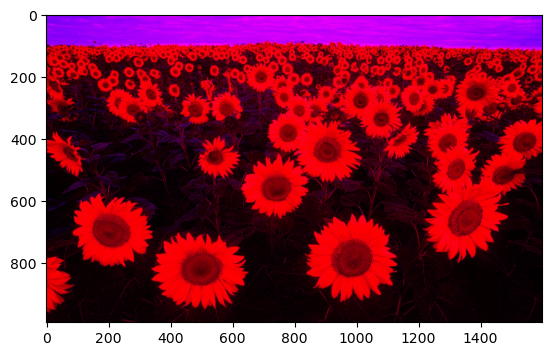

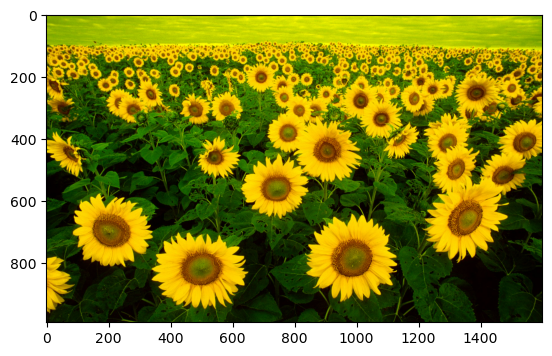

In [4]:
img_no_red = np.copy(image_arr)
img_no_red[:, :, 0] = 0

plt.figure()
plt.imshow(img_no_red)
plt.show()

img_no_green = np.copy(image_arr)
img_no_green[:, :, 1] = 0

plt.figure()
plt.imshow(img_no_green)
plt.show()

img_no_blue = np.copy(image_arr)
img_no_blue[:, :, 2] = 0

plt.figure()
plt.imshow(img_no_blue)
plt.show()

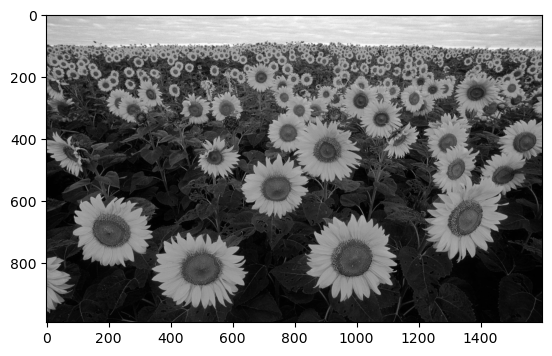

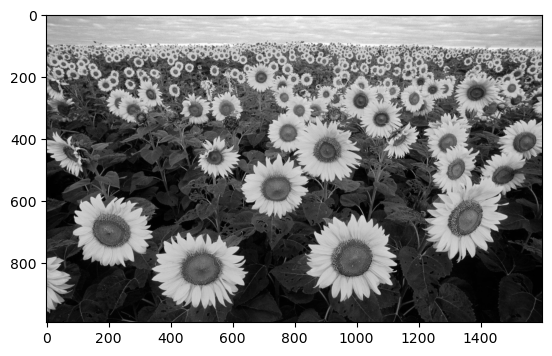

In [5]:
gray_img = np.mean(image_arr, axis=2)

plt.figure()
plt.imshow(gray_img, cmap="gray")
plt.show()

gray_img_weighted = 0.299 * r_image + 0.587 * g_image + 0.114 * b_image

plt.figure()
plt.imshow(gray_img_weighted, cmap="gray")
plt.show()

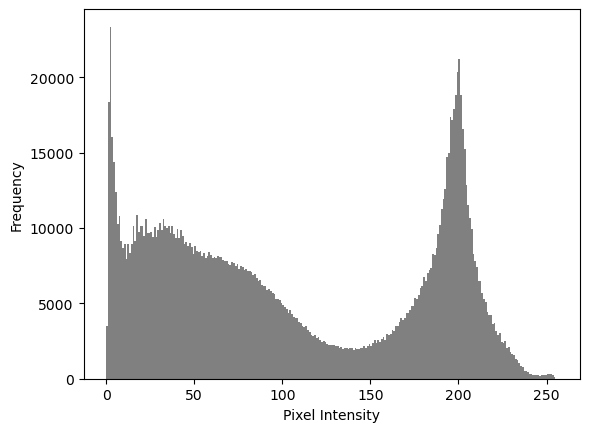

In [6]:
pixel_values = gray_img_weighted.flatten()

plt.hist(pixel_values, bins=256, range=(0, 256), color='gray')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

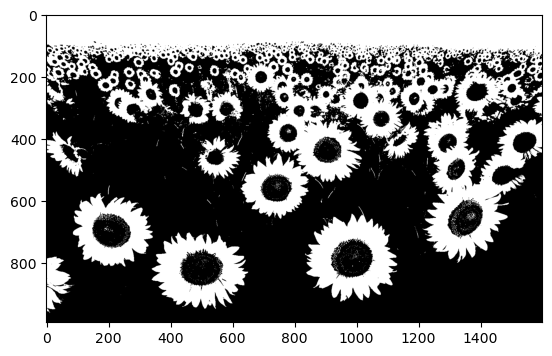

In [7]:
threshold = 128

binary_image = np.zeros(np.shape(gray_img_weighted))

for i in range(len(gray_img_weighted)):
    for j in range(len(gray_img_weighted[i])):
        if gray_img_weighted[i][j] >= threshold:
            binary_image[i, j] = 1
        else:
            binary_image[i, j] = 0

# binary_image = gray_img_weighted > threshold

plt.figure()
plt.imshow(binary_image, cmap="gray")
plt.show()

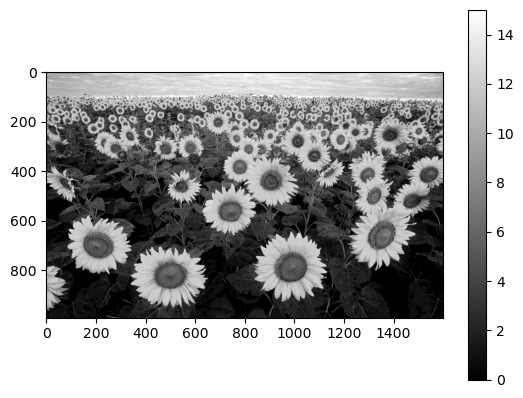

In [8]:
image_4bit = gray_img_weighted // 16

plt.figure()
plt.imshow(image_4bit, cmap="gray")
plt.colorbar()
plt.show()

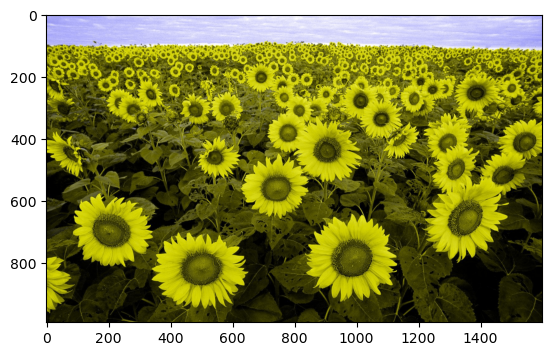

In [9]:
swapped_image = np.copy(image_arr)
swapped_image[:, :, 0], swapped_image[:, :, 1] = swapped_image[:, :, 1], swapped_image[:, :, 0]

plt.figure()
plt.imshow(swapped_image)
plt.show()

Pixel v_cts = 50, h_cts = 50


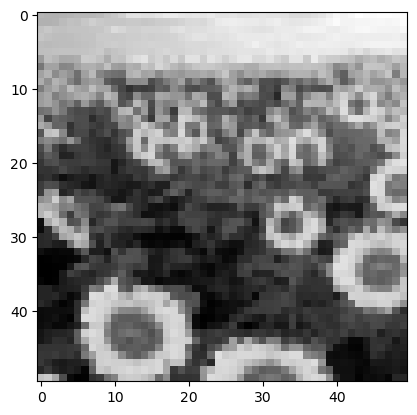

In [10]:
# Cropping the image to 800 by 800 pxl
cropped_img_arr = gray_img_weighted[:800, :800]

v_cts, h_cts = np.shape(cropped_img_arr)

bin_dim = 16 # keep it st it is a factor of 800

binned_arr = np.zeros([int(v_cts / bin_dim), int(h_cts / bin_dim)], dtype = float)

v_cts_cropped, h_cts_cropped = np.shape(binned_arr)

print(f"Pixel v_cts = {v_cts_cropped}, h_cts = {h_cts_cropped}")

for i in range(int(v_cts / bin_dim)):
    for j in range(int(h_cts / bin_dim)):
        sub_mat = cropped_img_arr[i* bin_dim:(i+1)*bin_dim, j*bin_dim:(j+1)*bin_dim]
        avg_val = np.mean(sub_mat)
        binned_arr[i, j] = avg_val

plt.figure()
plt.imshow(binned_arr, cmap="grey")
plt.show()

1600


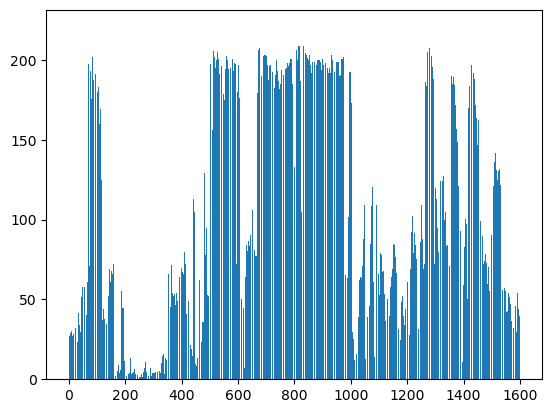

In [11]:
row_pxl, col_pxl = np.shape(gray_img_weighted)

print(col_pxl)

# Extracting a single row
row_img = gray_img_weighted[row_pxl // 2, :]

plt.bar(np.arange(len(row_img)), row_img)

# plt.imshow(row_img[None, :]) # Doesn't work
# plt.axis('off')

plt.show()

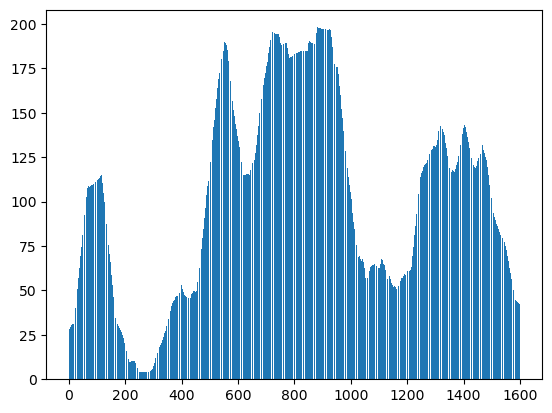

In [12]:
len_padding = 50

padded_arr = np.zeros(len(row_img) + len_padding * 2)

for i in range(len(row_img)):
    padded_arr[i + len_padding] += row_img[i]

padded_arr[0 : len_padding] = row_img[0]
padded_arr[ -len_padding : ] = row_img[-1]

corr_arr = np.zeros(len(row_img))

for i in range(len(corr_arr)):
    ctr = 0
    for j in range(2 * len_padding):
        ctr += 1
        corr_arr[i] += (padded_arr[i + j])

    corr_arr[i] = corr_arr[i] / ctr

plt.bar(np.arange(len(corr_arr)), corr_arr)
plt.show()

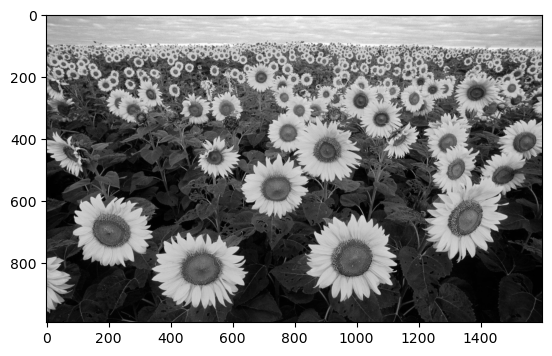

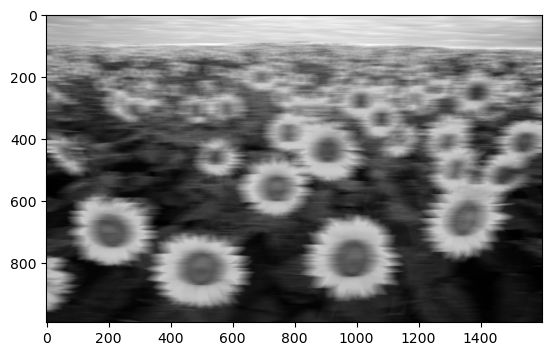

In [14]:
# Applying a box-function filter whose width == 2 * len_padding + 1

corr_img = np.zeros(np.shape(gray_img_weighted), dtype = float)

len_padding = 25

for idx, row_img in enumerate(gray_img_weighted):

    padded_arr = np.zeros(len(row_img) + len_padding * 2)

    for i in range(len(row_img)):
        padded_arr[i + len_padding] += row_img[i]

    padded_arr[0 : len_padding] = row_img[0]
    padded_arr[ -len_padding : ] = row_img[-1]

    corr_arr = np.zeros(len(row_img))

    for i in range(len(corr_arr)):
        ctr = 0
        for j in range(2 * len_padding):
            ctr += 1
            corr_arr[i] += (padded_arr[i + j])

        corr_arr[i] = corr_arr[i] / ctr

    corr_img[idx] += corr_arr

plt.figure()
plt.imshow(gray_img_weighted, cmap="grey")
plt.show()

plt.figure()
plt.imshow(corr_img, cmap="grey")
plt.show()

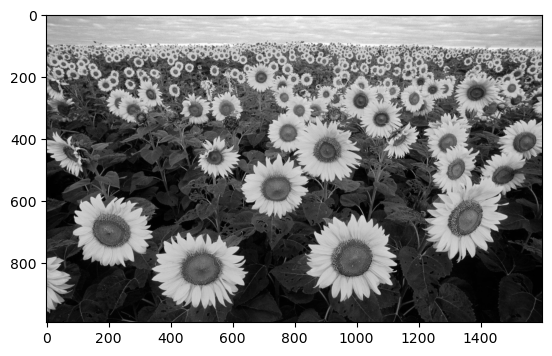

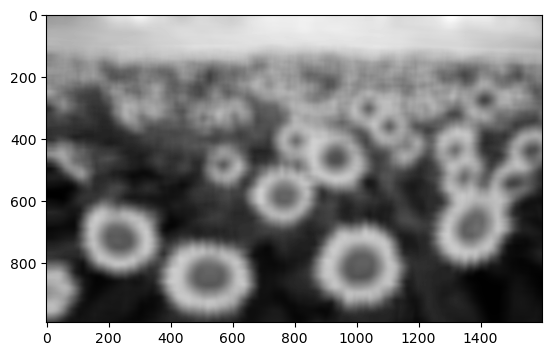

In [26]:
kernel = 1/2500 * np.ones((50,50), dtype=float)
len_padding = 50

rows, cols = gray_img_weighted.shape
padded_arr_1d = np.zeros((rows, cols + len_padding * 2), dtype=float)

for row_img_idx, row_img in enumerate(gray_img_weighted):
    padded_arr = np.zeros(len(row_img) + len_padding * 2, dtype=float)
    padded_arr[len_padding:len_padding + len(row_img)] = row_img

    padded_arr[0:len_padding] = row_img[0]
    padded_arr[-len_padding:] = row_img[-1]

    padded_arr_1d[row_img_idx] = padded_arr

padded_arr_2d = np.zeros((rows + len_padding * 2, cols + len_padding * 2), dtype=float)
padded_arr_2d[len_padding : len_padding + rows] = padded_arr_1d

padded_arr_2d[0 : len_padding] = padded_arr_1d[0]
padded_arr_2d[-len_padding : ] = padded_arr_1d[-1]

def sum_mat(arr, kernel):

    sum_val = 0
    for i in range(len(kernel)):
        for j in range(len(kernel[i])):
            sum_val += arr[i][j] * kernel[i][j]

    return sum_val

convolved_img = np.zeros(np.shape(gray_img_weighted), dtype=float)

for i in range(rows):
    for j in range(cols):

        arr = padded_arr_2d[i : i + len(kernel), j : j + len(kernel)]

        convolved_img[i, j] += sum_mat(arr, kernel)

plt.figure()
plt.imshow(gray_img_weighted, cmap="grey")
plt.show()

plt.figure()
plt.imshow(convolved_img, cmap="grey")
plt.show()

1.0


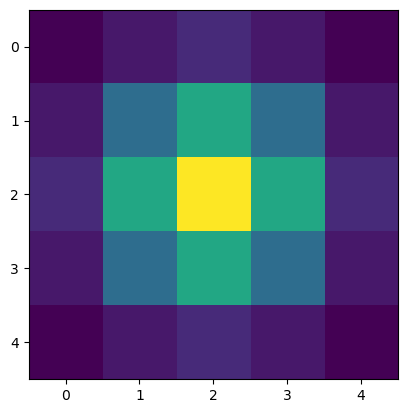

In [28]:
def gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                    np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

size = 5
sigma = 1.0

gaussian_kernel_5x5 = gaussian_kernel(size, sigma)

print(np.sum(gaussian_kernel_5x5))

plt.figure()
plt.imshow(gaussian_kernel_5x5)
plt.show()

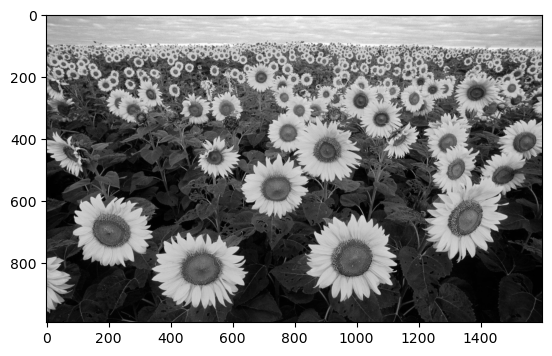

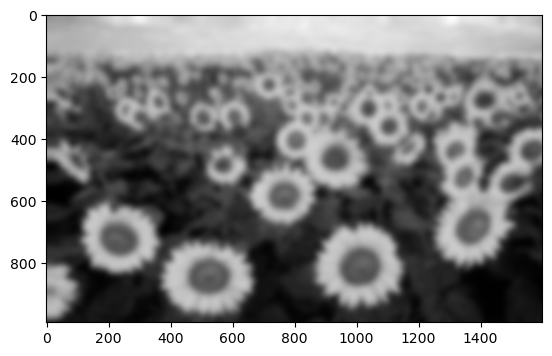

In [31]:
# Gaussian Blurr : Convolution using Gaussian Kernel

def gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                    np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

size = 50
sigma = 10.0

kernel = gaussian_kernel(size, sigma)

rows, cols = gray_img_weighted.shape
padded_arr_1d = np.zeros((rows, cols + len_padding * 2), dtype=float)

for row_img_idx, row_img in enumerate(gray_img_weighted):
    padded_arr = np.zeros(len(row_img) + len_padding * 2, dtype=float)
    padded_arr[len_padding:len_padding + len(row_img)] = row_img

    padded_arr[0:len_padding] = row_img[0]
    padded_arr[-len_padding:] = row_img[-1]

    padded_arr_1d[row_img_idx] = padded_arr

padded_arr_2d = np.zeros((rows + len_padding * 2, cols + len_padding * 2), dtype=float)
padded_arr_2d[len_padding : len_padding + rows] = padded_arr_1d

padded_arr_2d[0 : len_padding] = padded_arr_1d[0]
padded_arr_2d[-len_padding : ] = padded_arr_1d[-1]

def sum_mat(arr, kernel):

    sum_val = 0
    for i in range(len(kernel)):
        for j in range(len(kernel[i])):
            sum_val += arr[i][j] * kernel[i][j]

    return sum_val

convolved_img = np.zeros(np.shape(gray_img_weighted), dtype=float)

for i in range(rows):
    for j in range(cols):

        arr = padded_arr_2d[i : i + len(kernel), j : j + len(kernel)]

        convolved_img[i, j] += sum_mat(arr, kernel)

plt.figure()
plt.imshow(gray_img_weighted, cmap="grey")
plt.show()

plt.figure()
plt.imshow(convolved_img, cmap="grey")
plt.show()